In [102]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style 
style.available


['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [99]:
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind

In [167]:
style.use('seaborn-pastel') #sets the size of the charts  seaborn-poster
style.use('seaborn-dark-palette')


In [104]:
#importing rat sightings csv file
rat_sightings = pd.read_csv("rat_sightings/rat_sightings.csv")

In [105]:
# importing inspections csv file
inspections = pd.read_csv("rodent_inspections/rodent-inspection.csv")

In [106]:
sightings_unique = rat_sightings["Borough"].unique()


In [107]:
sightings_unique[1]

'STATEN ISLAND'

In [108]:
#renaming cities for consistency
rename = {}

for i in sightings_unique: 
    print (i)
    print (i.lower().capitalize())
    rename[i] = i.lower().capitalize()
rename ["Staten island"] = "Staten Island"

MANHATTAN
Manhattan
STATEN ISLAND
Staten island
BROOKLYN
Brooklyn
BRONX
Bronx
QUEENS
Queens
Unspecified
Unspecified


In [109]:
# renaming columns for consistency
new_df = rat_sightings[["Borough","Unique Key","Incident Zip"]].replace(to_replace = rename)
new_df["Borough"]
del (rat_sightings)

In [110]:
inspections.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,BAIT,37453,PO199209,2,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-11-18T12:50:18,Bait applied,2010-11-19T08:43:21,"{'latitude': '40.779464247848', 'longitude': '..."
1,BAIT,38432,PO199209,3,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-12-02T10:44:16,Bait applied,2010-12-07T09:34:01,"{'latitude': '40.779464247848', 'longitude': '..."
2,BAIT,40616,PO174802,2,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2010-12-20T11:56:13,Bait applied,2010-12-28T15:16:07,"{'latitude': '40.844290674523', 'longitude': '..."
3,BAIT,41357,PO199209,4,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2011-01-04T11:40:38,Bait applied,2011-01-06T15:04:17,"{'latitude': '40.779464247848', 'longitude': '..."
4,BAIT,41838,PO174802,3,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2011-01-10T10:08:18,Bait applied,2011-01-10T14:49:51,"{'latitude': '40.844290674523', 'longitude': '..."


In [111]:
inspections.rename(columns = {"BOROUGH":"Borough"}, inplace = True)
inspections.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,Borough,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,BAIT,37453,PO199209,2,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-11-18T12:50:18,Bait applied,2010-11-19T08:43:21,"{'latitude': '40.779464247848', 'longitude': '..."
1,BAIT,38432,PO199209,3,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-12-02T10:44:16,Bait applied,2010-12-07T09:34:01,"{'latitude': '40.779464247848', 'longitude': '..."
2,BAIT,40616,PO174802,2,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2010-12-20T11:56:13,Bait applied,2010-12-28T15:16:07,"{'latitude': '40.844290674523', 'longitude': '..."
3,BAIT,41357,PO199209,4,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2011-01-04T11:40:38,Bait applied,2011-01-06T15:04:17,"{'latitude': '40.779464247848', 'longitude': '..."
4,BAIT,41838,PO174802,3,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2011-01-10T10:08:18,Bait applied,2011-01-10T14:49:51,"{'latitude': '40.844290674523', 'longitude': '..."


In [113]:
# creating new dataframes for different datasets
df_2 = inspections[['ZIP_CODE','JOB_ID']]
# df_2= df.groupby(['Borough']).count()
df_3= new_df.groupby(['Incident Zip'],as_index=False).count().rename(columns={"Unique Key":"Total Sightings", "Incident Zip": "ZIP_CODE"})
#df_4 = df_3.pivot(columns="JOB_ID",index="Borough",values="Total Sightings").fillna(0.0)
#sns.heatmap(gp,cbar=False)
df_3

,ZIP_CODE,Borough,Total Sightings
0,83.0,21,21
1,1123.0,1,1
2,10000.0,3,3
3,10001.0,383,383
4,10002.0,1299,1299
5,10003.0,627,627
6,10004.0,40,40
7,10005.0,18,18
8,10006.0,91,91
9,10007.0,249,249


In [114]:
# df_3.drop_duplicates(subset=["Borough","Total Sightings","Total Inspections"], keep=False)

In [115]:
df_4= df_2.groupby(['ZIP_CODE'],as_index=False).count().rename(columns={"JOB_ID":"Total Inspections"})

In [116]:
df_4

,ZIP_CODE,Total Inspections
0,0.0,1015
1,10001.0,4412
2,10002.0,28016
3,10003.0,32185
4,10004.0,1148
5,10005.0,1658
6,10006.0,2710
7,10007.0,3294
8,10009.0,17802
9,10010.0,19425


In [117]:
# reading in income csv dataset
income_location = pd.read_csv("Income/Income_zipcode.csv", encoding = "ISO-8859-1")
income_location.head(10)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328
5,1011050,1,Alabama,AL,Cullman County,Cullman,Dodge City,Town,place,35057,256,8913021,26837,34.045414,-86.882670,50715,42643,35886,173.325959
6,1011060,1,Alabama,AL,Escambia County,East Brewton,East Brewton city,City,place,36426,251,8826252,91015,31.091440,-87.055345,33737,23610,28256,758.771322
7,1011070,1,Alabama,AL,Elmore County,Coosada,Elmore,Town,place,36020,334,10222339,176500,32.544337,-86.336446,46319,40242,38941,397.052564
8,1011080,1,Alabama,AL,Morgan County,Eva,Eva,Town,place,35621,256,10544874,78981,34.326504,-86.765318,57994,39591,47235,137.496038
9,1011090,1,Alabama,AL,Talladega County,Sylacauga,Fayetteville,CDP,place,35151,256,45178321,6034534,33.168097,-86.442774,54807,41712,51359,380.728238


In [118]:
# renaming columns for consistency
income_location.rename(columns = {"Zip_Code":"ZIP_CODE", "Median":"Median Income"}, inplace = True)
income_location.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,ZIP_CODE,Area_Code,ALand,AWater,Lat,Lon,Mean,Median Income,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [120]:
# combining inspections and rat sightings datasets
df = pd.merge(df_4, df_3, how='outer', sort=True, on=["ZIP_CODE"])
df.head()

,ZIP_CODE,Total Inspections,Borough,Total Sightings
0,0.0,1015.0,NaN,NaN
1,83.0,NaN,21.0,21.0
2,1123.0,NaN,1.0,1.0
3,10000.0,NaN,3.0,3.0
4,10001.0,4412.0,383.0,383.0


In [121]:
df = df[df["ZIP_CODE"]!=0]


In [122]:
# merging income dataset with new combined dataset (rat sightings and inspections)
new = pd.merge(df, income_new, how='outer', sort=True, on=["ZIP_CODE"])
new.head()

,ZIP_CODE,Total Inspections,Borough,Total Sightings,Median Income
0,83.0,NaN,21.0,21.0,NaN
1,601.0,NaN,NaN,NaN,15004.0
2,601.0,NaN,NaN,NaN,9378.0
3,601.0,NaN,NaN,NaN,15051.0
4,602.0,NaN,NaN,NaN,12641.0


In [123]:
# drop NaN values
new = new.dropna()

In [124]:
new = new[new["ZIP_CODE"]!=0]
new = new[new["ZIP_CODE"]!=83]

In [125]:
# Code for chart 1 [rat inspections and sightings by zip code]
# fig, ax = plt.subplots()
# sns.catplot(x="ZIP_CODE", y="Total Sightings", kind="swarm", data=df, ax=ax, color = "b")
# ax2 = ax.twinx()
# sns.catplot(x="ZIP_CODE", y="Total Inspections", kind="swarm", data=df, ax=ax2, color = "r")

In [126]:
df['ZIP_CODE_STR'] = df['ZIP_CODE'].astype(int).astype(str)


In [201]:
test = new['ZIP_CODE_STR'] = new['ZIP_CODE'].astype(int).astype(str)

In [202]:

# num_labels

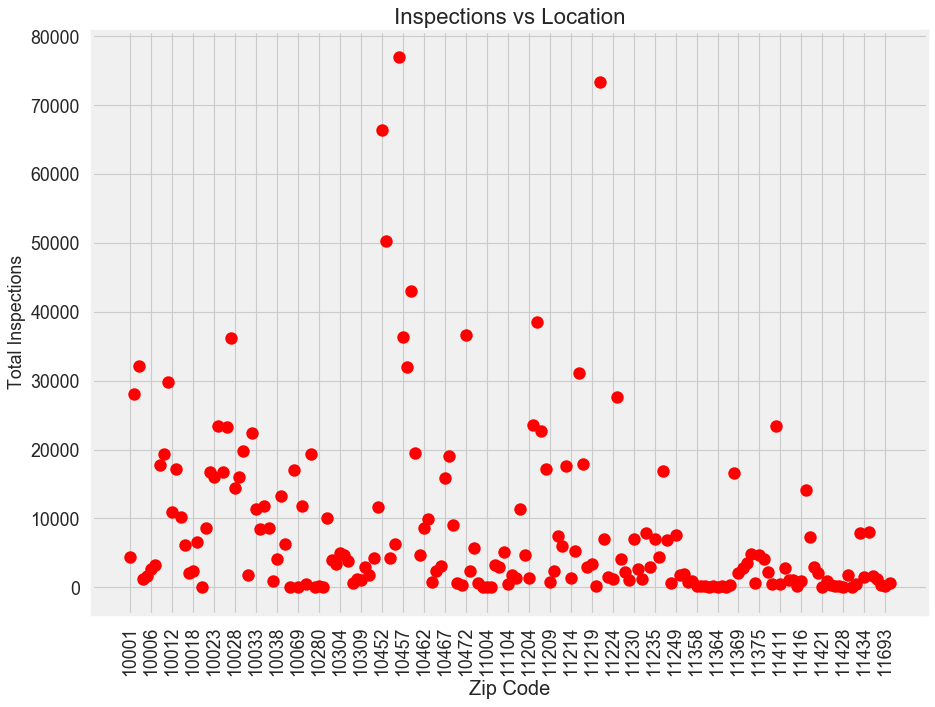

In [203]:
#Inspections by zip code

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

plt.plot(df["ZIP_CODE_STR"], df["Total Inspections"], 'ro')
skip_labels = 5
num_labels = len(df["ZIP_CODE_STR"]) // skip_labels + 1
x = [i*skip_labels for i in range(num_labels)]
plt.xticks(x, df[["ZIP_CODE_STR"]].iloc[::skip_labels, 0], rotation='vertical')
# df.iplot(kind='scatter', mode='markers', x='ZIP_CODE_STR', y="Total Inspections")
# IFrame('https://plot.ly/~kwaday/38', width = 900, height = 600) # use subplot 
# df.iplot()
plt.title('Inspections vs Location', fontsize=20)
plt.xlabel('Zip Code', fontsize=18)
plt.ylabel('Total Inspections', fontsize=16)
plt.savefig('zipcode_inspections.png')
plt.show()



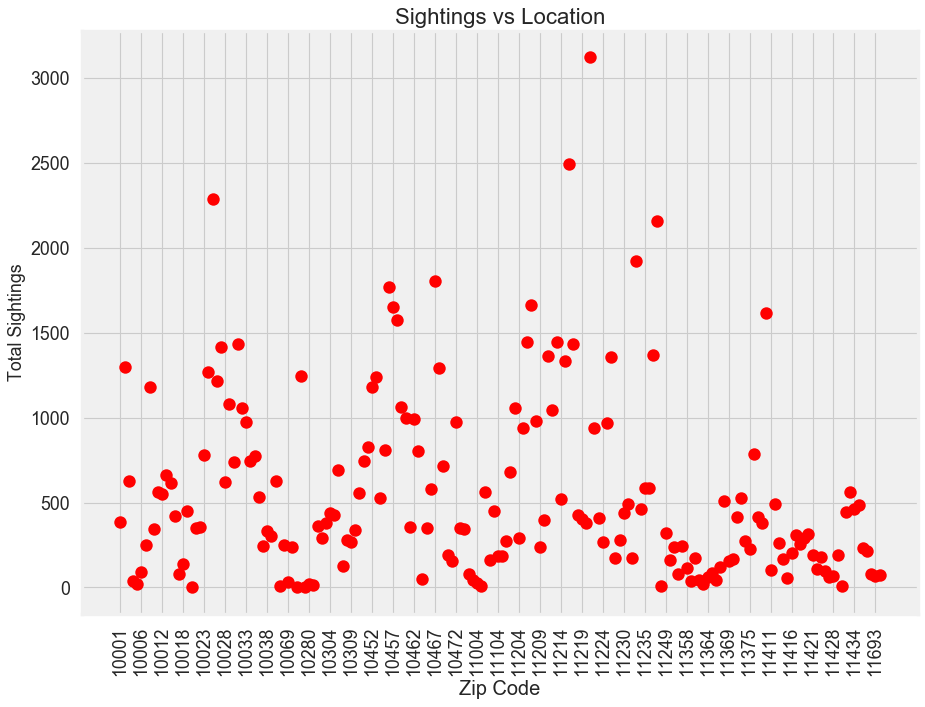

In [240]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

plt.plot(df["ZIP_CODE_STR"], df["Total Sightings"], 'ro')
skip_labels = 5
num_labels = len(df["ZIP_CODE_STR"]) // skip_labels + 1
x = [i*skip_labels for i in range(num_labels)]
plt.xticks(x, df[["ZIP_CODE_STR"]].iloc[::skip_labels, 0], rotation='vertical')
plt.title('Sightings vs Location', fontsize=20)
plt.xlabel('Zip Code', fontsize=18)
plt.ylabel('Total Sightings', fontsize=16)
plt.savefig('zipcode_sightings.png')
plt.show()


In [205]:
#dropping outlier values
new = new[new["Median Income"]!=300000]
new = new[new["Median Income"]!=0]

new

,ZIP_CODE,Total Inspections,Borough,Total Sightings,Median Income,ZIP_CODE_STR
2778,10001.0,4412.0,383.0,383.0,40262.0,10001
2779,10002.0,28016.0,1299.0,1299.0,91469.0,10002
2781,10002.0,28016.0,1299.0,1299.0,17698.0,10002
2782,10002.0,28016.0,1299.0,1299.0,77632.0,10002
2783,10002.0,28016.0,1299.0,1299.0,16069.0,10002
2784,10002.0,28016.0,1299.0,1299.0,43966.0,10002
2785,10002.0,28016.0,1299.0,1299.0,65713.0,10002
2790,10003.0,32185.0,627.0,627.0,152561.0,10003
2791,10003.0,32185.0,627.0,627.0,34818.0,10003
2795,10004.0,1148.0,40.0,40.0,119255.0,10004


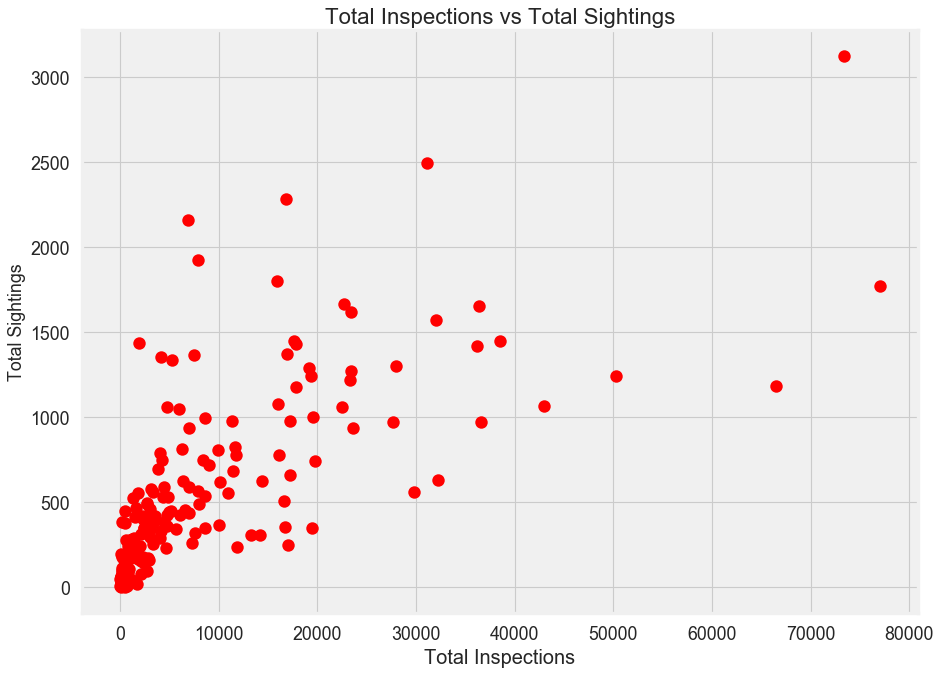

In [241]:
#Total inspections by Total Sightings

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

plt.plot(df["Total Inspections"], df["Total Sightings"], 'ro')
skip_labels = 5
num_labels = len(df["Total Inspections"]) // skip_labels + 1
x = [i*skip_labels for i in range(num_labels)]
plt.title('Total Inspections vs Total Sightings', fontsize=20)
plt.xlabel('Total Inspections', fontsize=18)
plt.ylabel('Total Sightings', fontsize=16)
plt.savefig('sightings_inspections.png')
plt.show()



In [208]:
#drop NaN values
df = df.dropna()

In [209]:
# dropping outlier values
df[df["ZIP_CODE"] !=1123]
df

,ZIP_CODE,Total Inspections,Borough,Total Sightings,ZIP_CODE_STR
4,10001.0,4412.0,383.0,383.0,10001
5,10002.0,28016.0,1299.0,1299.0,10002
6,10003.0,32185.0,627.0,627.0,10003
7,10004.0,1148.0,40.0,40.0,10004
8,10005.0,1658.0,18.0,18.0,10005
9,10006.0,2710.0,91.0,91.0,10006
10,10007.0,3294.0,249.0,249.0,10007
11,10009.0,17802.0,1179.0,1179.0,10009
12,10010.0,19425.0,346.0,346.0,10010
13,10011.0,29808.0,559.0,559.0,10011


In [210]:
df.columns
new.columns

Index(['ZIP_CODE', 'Total Inspections', 'Borough', 'Total Sightings',
       'Median Income', 'ZIP_CODE_STR'],
      dtype='object')

In [211]:
new[["Median Income", "ZIP_CODE"]]

,Median Income,ZIP_CODE
2778,40262.0,10001.0
2779,91469.0,10002.0
2781,17698.0,10002.0
2782,77632.0,10002.0
2783,16069.0,10002.0
2784,43966.0,10002.0
2785,65713.0,10002.0
2790,152561.0,10003.0
2791,34818.0,10003.0
2795,119255.0,10004.0


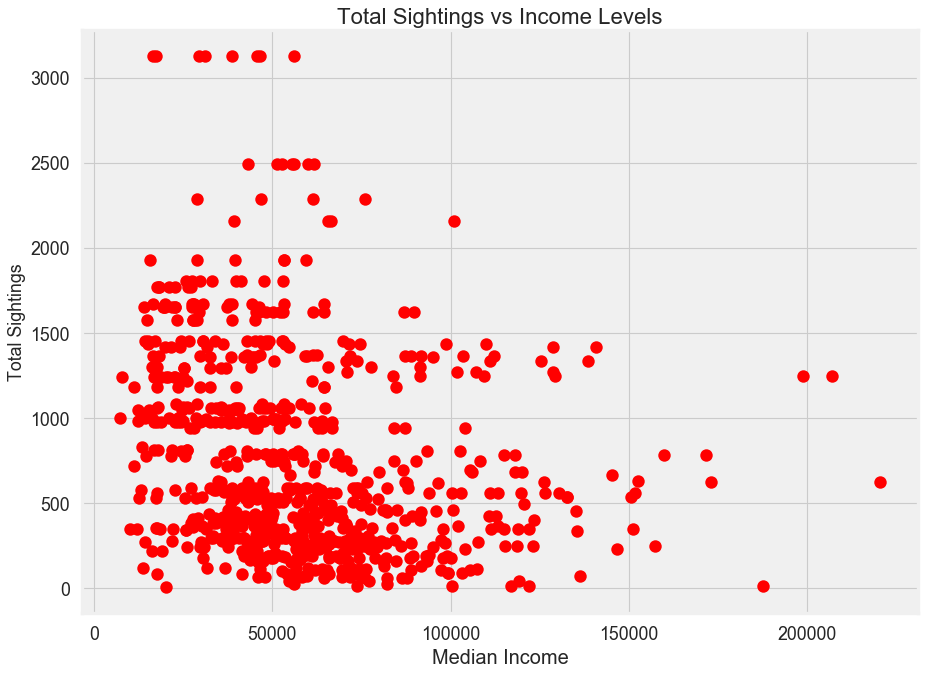

In [221]:
#Total Sightings by Income Level/socieconomic status 
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

plt.plot(new["Median Income"], new["Total Sightings"], 'ro')
skip_labels = 5
# num_labels = len(df["Median Income"]) // skip_labels + 1
x = [i*skip_labels for i in range(num_labels)]
plt.title('Total Sightings vs Income Levels', fontsize=20)
plt.xlabel('Median Income', fontsize=18)
plt.ylabel('Total Sightings', fontsize=16)
plt.savefig('income_sightings.png')
plt.show()




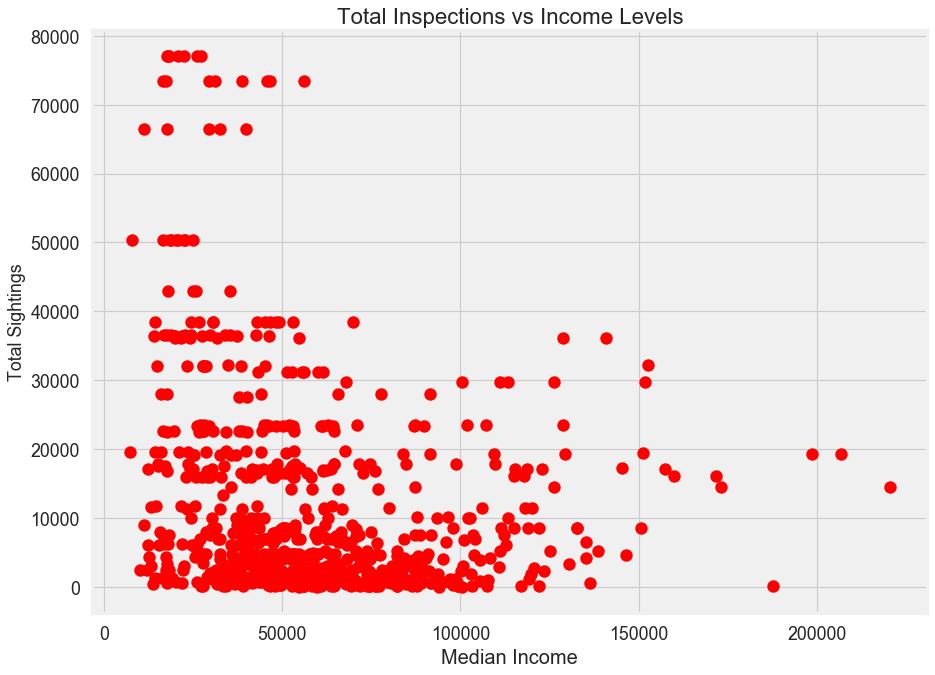

In [220]:
# Inspections vs Median Income
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(new["Median Income"], new["Total Inspections"], 'ro')
skip_labels = 5
# num_labels = len(df["Median Income"]) // skip_labels + 1
x = [i*skip_labels for i in range(num_labels)]
plt.title('Total Inspections vs Income Levels', fontsize=20)
plt.xlabel('Median Income', fontsize=18)
plt.ylabel('Total Sightings', fontsize=16)
plt.savefig('income_inspections.png')
plt.show()


In [195]:
#Test for correlation between total sightings and inspections
ind_t_test = stats.spearmanr(new['Total Sightings'], new['Total Inspections'])
ind_t_test

SpearmanrResult(correlation=0.8125366229462029, pvalue=4.293842001619144e-176)

In [196]:
#low correlation between income and rat sightings
ind_t_test = stats.spearmanr(new['Median Income'], new['Total Sightings'])
ind_t_test

SpearmanrResult(correlation=-0.3274952552208044, pvalue=4.643731112401965e-20)

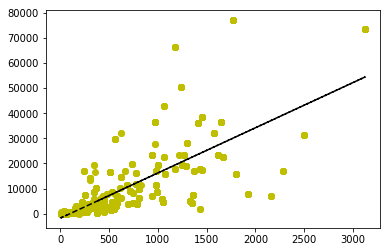

In [136]:
x = new['Total Sightings']
y = new['Total Inspections']
fit = np.polyfit(x,y,1)
 = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

In [137]:
fit

array([   17.99762802, -1784.81462129])